<a href="https://colab.research.google.com/github/gasoares23/IC/blob/main/ProblemaG1_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-opt

best_x is  [100. 100. 100.   0.   0. 100. 100. 100. 100. 100. 100. 100. 100.] best_y is [983408.]


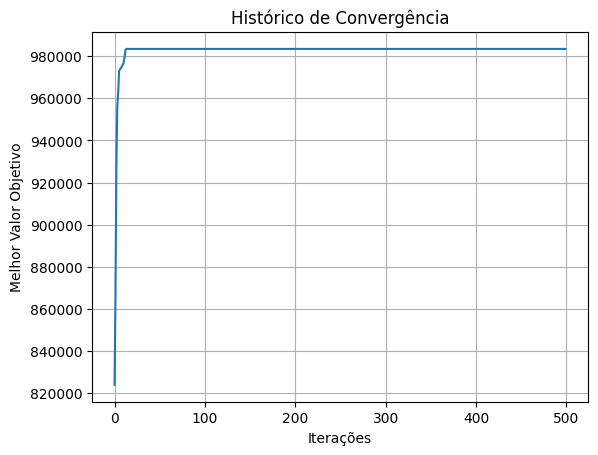

In [28]:
import numpy as np
from sko.PSO import PSO
import matplotlib.pyplot as plt

def demo_func(x):
    penalty = 0
    # Restrição 1
    g1 = 2 * x[0] + 2 * x[1] + x[9] + x[10] - 10
    if g1 > 0:
        penalty += g1**2
    # Restrição 2
    g2 = 2 * x[0] + 2 * x[2] + x[9] + x[11] - 10
    if g2 > 0:
        penalty += g2**2
    # Restrição 3
    g3 = 2 * x[1] + 2 * x[2] + x[10] + x[11] - 10
    if g3 > 0:
        penalty += g3**2
    # Restrição 4
    g4 = -8 * x[0] + x[9]
    if g4 > 0:
        penalty += g4**2
    # Restrição 5
    g5 = -8 * x[1] + x[10]
    if g5 > 0:
        penalty += g5**2
    # Restrição 6
    g6 = -8 * x[2] + x[11]
    if g6 > 0:
        penalty += g6**2
    # Restrição 7
    g7 = -2 * x[3] - x[4] + x[9]
    if g7 > 0:
        penalty += g7**2
    # Restrição 8
    g8 = -2 * x[5] - x[6] + x[10]
    if g8 > 0:
        penalty += g8**2
    # Restrição 9
    g9 = -2 * x[7] - x[8] + x[11]
    if g9 > 0:
        penalty += g9**2
    # Restrição 10
    for i in range(9):
        if x[i] < 0 or x[i] > 1:
            penalty += (max(0, -x[i])**2 + max(0, x[i] - 1)**2)
    # Restrição 11
    for i in range(9, 12):
        if x[i] < 0 or x[i] > 100:
            penalty += (max(0, -x[i])**2 + max(0, x[i] - 100)**2)
    # Restrição 12
    if x[12] < 0 or x[12] > 1:
        penalty += (max(0, -x[12])**2 + max(0, x[12] - 1)**2)

    # Função objetivo
    return -1 * (5 * x[0] + 5 * x[1] + 5 * x[2] + 5 * x[3] - 5 * np.sum(x[:4]**2) - np.sum(x[4:]) + penalty)

pso = PSO(func=demo_func, n_dim=13, pop=200, max_iter=500, lb=[0.0] * 13, ub=[100.0] * 13)
pso.run()

print('best_x is ', pso.gbest_x, 'best_y is', -1 * pso.gbest_y)

plt.plot(-1 * np.array(pso.gbest_y_hist))  # invertendo o sinal dos valores do histórico para plotagem correta
plt.xlabel('Iterações')
plt.ylabel('Melhor Valor Objetivo')
plt.title('Histórico de Convergência')
plt.grid(True)
plt.show()
